In [ ]:
!pip install seaborn

In [ ]:
#Fasi preliminare utilizzate come analisi
import pandas as pd
from collections import defaultdict

def categorize_metrics(input_file, output_file):
    # Leggi il file Excel
    df = pd.read_excel(input_file)

    # Definizione delle categorie principali e relative sottocategorie
    categories = {
        'Quality': {
            'keywords': ['quality', 'defect', 'scrap', 'ppm', 'ftq', 'cp', 'cpk', 'cm', 'cmk', 'statistical', 'merf'],
            'subcategories': {
                'Defect Analysis': ['defect', 'scrap', 'ppm'],
                'Process Control': ['statistical', 'cp', 'cpk', 'cm', 'cmk'],
                'Testing Metrics': ['ftq', 'merf', 'test'],
                'Quality Systems': ['matrix', 'fmea', 'gate', 'network']
            }
        },
        'Cost': {
            'keywords': ['cost', 'saving', 'expense', 'maintenance', 'inventory', 'production cost', 'emerging losses'],
            'subcategories': {
                'Cost Reduction': ['saving', 'expense', 'cost reduction'],
                'Maintenance': ['maintenance', 'mtbf', 'mttr'],
                'Inventory': ['inventory', 'stock'],
                'Production Costs': ['production cost', 'emerging losses']
            }
        },
        'Sustainability': {
            'keywords': ['sustainability', 'energy', 'water', 'co2', 'emission', 'waste', 'recycle', 'environment'],
            'subcategories': {
                'Energy': ['energy', 'consumption'],
                'Waste Management': ['waste', 'recycle'],
                'Emissions': ['co2', 'emission'],
                'Water': ['water']
            }
        },
        'People': {
            'keywords': ['people', 'training', 'absenteeism', 'competence', 'suggestion', 'voice', 'employment', 'polivalenza'],
            'subcategories': {
                'Training': ['training', 'competence'],
                'Absenteeism': ['absenteeism'],
                'Engagement': ['suggestion', 'voice'],
                'Diversity': ['employment', 'woman', 'women']
            }
        },
        'Delivery': {
            'keywords': ['delivery', 'production', 'execution', 'kanban', 'kitting', 'lead time', 'inventory', 'ole'],
            'subcategories': {
                'Production Execution': ['production', 'execution'],
                'Logistics': ['kanban', 'kitting', 'inventory'],
                'Performance': ['ole', 'lead time']
            }
        },
        'Safety': {
            'keywords': ['safety', 'injury', 'incident', 'heinrich', 'pyramid', 'unsafe', 'smat', 'ifi', 'isi'],
            'subcategories': {
                'Incident Rates': ['injury', 'incident', 'ifi', 'isi'],
                'Safety Systems': ['smat', 'pyramid'],
                'Risk Assessment': ['unsafe', 'near miss']
            }
        }
    }

    # Funzione per assegnare categorie
    def assign_category(metric_name):
        metric_lower = metric_name.lower()
        for main_category, data in categories.items():
            for keyword in data['keywords']:
                if keyword in metric_lower:
                    # Assegna la categoria principale
                    main_cat = main_category

                    # Assegna la sottocategoria
                    sub_cat = 'Other'
                    for subcategory, sub_keywords in data['subcategories'].items():
                        for sub_kw in sub_keywords:
                            if sub_kw in metric_lower:
                                sub_cat = subcategory
                                break

                    return f"{main_cat} - {sub_cat}"
        return "Uncategorized"

    # Applica la categorizzazione
    df['Category'] = df['MetricNameRaw'].apply(assign_category)

    # Separa la colonna Category in MainCategory e SubCategory
    df[['MainCategory', 'SubCategory']] = df['Category'].str.split(' - ', expand=True)
    df.drop('Category', axis=1, inplace=True)

    # Riordina le colonne
    df = df[['MetricNameRaw', 'MainCategory', 'SubCategory', 'LevelCode', 'ClusterCode']]

    # Salva il nuovo file Excel
    df.to_excel(output_file, index=False)
    print(f"File categorizzato salvato come: {output_file}")

    return df

# Utilizzo della funzione
input_file = "output.xlsx"  # Sostituisci con il tuo percorso
output_file = "categorized_metrics.xlsx"
categorized_df = categorize_metrics(input_file, output_file)

# Stampa un riepilogo delle categorie
print("\nRiepilogo categorizzazione:")
print(categorized_df[['MainCategory', 'SubCategory']].value_counts().to_string())

In [1]:
import pandas as pd

# Carica il dataset
df = pd.read_excel("/content/DatasetPerTesi.xlsx")
# display(df)


# Raggruppa e conta le occorrenze
grouped = df.groupby(['MetricName', 'EntityId']).size().reset_index(name='Count')

# Seleziona le top 10 combinazioni
top_combinations = grouped.sort_values('Count', ascending=False).head(3000)

# Esporta in Excel
output_path = "/content/EntityId.xlsx"

print(f"File esportato con successo: {output_path}")
print("\nContenuto esportato:")
display(top_combinations)

# Se stai usando Google Colab, sblocca il download
try:
    from google.colab import files
    files.download(output_path)  # Scarica automaticamente il file
    print("\nDownload avviato automaticamente!")
except:
    print("\nPer scaricare il file manualmente, clicca sul folder icon (📁) a sinistra e cerca:", output_path)

File esportato con successo: /content/EntityId.xlsx

Contenuto esportato:


,MetricName,EntityId,Count
709,Heinrich Pyramid,Brescia CV#Reparto Montaggio#Linea Ponti assal...,360
711,Heinrich Pyramid,"Brescia CV#Reparto Montaggio#Tratto DE, Sottog...",360
712,Heinrich Pyramid,"Brescia CV#Reparto Montaggio#Tratto F, Sottogr...",360
710,Heinrich Pyramid,Brescia CV#Reparto Montaggio#Motopropulsori,360
707,Heinrich Pyramid,Bolzano#Unit 1#Line A,241
...,...,...,...
1256,PARTS CLASSIFICATION (PFEP per PN),Annonay#OPERATIVE UNIT #1#Line #5,1
1257,PARTS CLASSIFICATION (PFEP per PN),Annonay#OPERATIVE UNIT #2#,1
1258,PARTS CLASSIFICATION (PFEP per PN),Annonay#OPERATIVE UNIT #2#Line #1,1
1259,PARTS CLASSIFICATION (PFEP per PN),Annonay#OPERATIVE UNIT #2#Line #2,1



Per scaricare il file manualmente, clicca sul folder icon (📁) a sinistra e cerca: /content/EntityId.xlsx


In [ ]:
#codice per anonimizzare i dati sia per quanto riguarda i PLANT che per quanto riguarda le metriche da dover impiegare
import pandas as pd
import re


# Carica il dataset
df = pd.read_excel("/content/DatasetPerTesi.xlsx")

# Mappatura per EntityId
entity_mapping = {
    'bolzano': 'PLIT01',
    'annonay': 'PLFRA01',
    'turin': 'PLIT02',
    'brescia': 'PLIT03',
    'foggia': 'PLIT04',
    'suzzara': 'PLIT05',
    'sete': 'PLBRA01',
    'cordoba': 'PLARG01',
    'madrid': 'PLSPA01',
    'piacenza': 'PLIT06',
    'rorthais': 'PLFRA02',
    'sfh': 'PLCN01',
    'valladolid': 'PLSPA02',
    'ulm': 'PLGER01',
    'vysoke myto': 'PLRPC01',
    'Sample Plant - DV&ASTRA': 'PLIT07',
    'Sample Plant - BUS': 'PLIT08',
    'Sample Plant - TRUCK': 'PLSPA03',
    'Sample Plant - PWT': 'PLSPA04',
    'bourbon lancy': 'PLFRA03'
}

# Funzione per anonimizzare EntityId
def anonimizza_entity(entity_name):
    if not isinstance(entity_name, str):
        return 'UNKNOWN'

    name = entity_name.lower().strip()

    # Gestione speciale per "Sample Plant - XYZ#..."
    if "sample plant" in name:
        # Estrae la parte dopo " - " e prima del "#" (es. "dv&astra" da "sample plant - dv&astra#machining#line a")
        match = re.search(r'sample plant - ([^#]+)', name)
        if match:
            sample_key = match.group(1).strip()  # "dv&astra"
            for key in entity_mapping:
                if key in sample_key or sample_key in key:
                    return entity_mapping[key]

    # Casi normali (non-Sample Plant)
    for key in entity_mapping:
        if re.search(rf'\b{re.escape(key)}\b', name, flags=re.IGNORECASE):
            return entity_mapping[key]

    return 'UNKNOWN'

df['EntityId_Anon'] = df['EntityId'].apply(anonimizza_entity)

# Mappatura per MetricName
metric_mapping = {
    'adpu': 'MET001',
    'cpa': 'MET002',
    'ifi': 'MET003',
    'total absenteeism': 'MET004',
    'vacation': 'MET005',
    'ftq': 'MET006',
    'manufacturing index': 'MET007',
    'daily production execution': 'MET008'
}

# Funzione per anonimizzare MetricName
def anonimizza_metrica(metric_name):
    name = str(metric_name).lower()
    for key in metric_mapping:
        if key in name:
            return metric_mapping[key]
    return 'OTHER_METRIC'

df['MetricName_Anon'] = df['MetricName'].apply(anonimizza_metrica)

# Filtra solo le righe con metriche riconosciute
df_filtrato = df[df['MetricName_Anon'] != 'OTHER_METRIC']
df_filtrato = df_filtrato[['Date', 'YearMonth', 'Target', 'Actual', 'EntityId_Anon', 'MetricName_Anon']]
display(df_filtrato)


,Date,YearMonth,Target,Actual,EntityId_Anon,MetricName_Anon
690,45292,2024-1,0.00,0.0,PLARG01,MET003
691,45323,2024-2,0.00,0.0,PLARG01,MET003
692,45170,2023-9,0.00,0.0,PLIT04,MET003
693,44927,2023-1,0.00,0.0,PLSPA01,MET003
694,44958,2023-2,0.00,0.0,PLSPA01,MET003
...,...,...,...,...,...,...
21952,45400,NaN,0.04,NaN,PLBRA01,MET003
21953,45401,NaN,0.04,NaN,PLBRA01,MET003
21954,45406,NaN,0.04,NaN,PLBRA01,MET003
21955,45408,NaN,0.04,NaN,PLBRA01,MET003


In [ ]:
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np

# Prima crea stats_original
stats_original = df_filtrato.groupby(['YearMonth', 'EntityId_Anon', 'MetricName_Anon']).agg({
    'Actual': 'count',
    'Target': 'count'
}).rename(columns={'Actual': 'count_actual', 'Target': 'count_target'}).reset_index()

synthetic_data = []

for _, row in stats_original.iterrows():
    # recupero i valori originali per quel gruppo
    original_actual = df_filtrato[
        (df_filtrato['YearMonth'] == row['YearMonth']) &
        (df_filtrato['EntityId_Anon'] == row['EntityId_Anon']) &
        (df_filtrato['MetricName_Anon'] == row['MetricName_Anon'])
    ]['Actual'].dropna().replace([np.inf, -np.inf], np.nan).dropna().values

    original_target = df_filtrato[
        (df_filtrato['YearMonth'] == row['YearMonth']) &
        (df_filtrato['EntityId_Anon'] == row['EntityId_Anon']) &
        (df_filtrato['MetricName_Anon'] == row['MetricName_Anon'])
    ]['Target'].dropna().replace([np.inf, -np.inf], np.nan).dropna().values

    # --- ACTUAL ---
    if len(original_actual) > 1 and np.std(original_actual) > 0:
        kde_actual = gaussian_kde(original_actual)
        actual_values = kde_actual.resample(row['count_actual']).flatten()
    elif len(original_actual) == 1:
        actual_values = np.repeat(original_actual[0], row['count_actual'])
    else:
        actual_values = np.zeros(row['count_actual'])  # fallback

    # --- TARGET ---
    if len(original_target) > 1 and np.std(original_target) > 0:
        kde_target = gaussian_kde(original_target)
        target_values = kde_target.resample(row['count_target']).flatten()
    elif len(original_target) == 1:
        target_values = np.repeat(original_target[0], row['count_target'])
    else:
        target_values = np.zeros(row['count_target'])  # fallback

    # creo i record sintetici
    for a, t in zip(actual_values, target_values):
        synthetic_data.append({
            'YearMonth': row['YearMonth'],
            'EntityId_Anon': row['EntityId_Anon'],
            'MetricName_Anon': row['MetricName_Anon'],
            'Actual': a,
            'Target': t
        })

df_synthetic = pd.DataFrame(synthetic_data)

# # STATISTICHE COMPARATIVE
# print("=== STATISTICHE COMPARATIVE ===")
# print(f"\nDATASET ORIGINALE:")
# print(f"Numero di record: {len(df_filtrato)}")
# print(f"Actual - Media: {df_filtrato['Actual'].mean():.2f}, Dev Std: {df_filtrato['Actual'].std():.2f}")
# print(f"Target - Media: {df_filtrato['Target'].mean():.2f}, Dev Std: {df_filtrato['Target'].std():.2f}")

# print(f"\nDATASET SINTETICO:")
# print(f"Numero di record: {len(df_synthetic)}")
# print(f"Actual - Media: {df_synthetic['Actual'].mean():.2f}, Dev Std: {df_synthetic['Actual'].std():.2f}")
# print(f"Target - Media: {df_synthetic['Target'].mean():.2f}, Dev Std: {df_synthetic['Target'].std():.2f}")

# SCARICA IL DATASET IN EXCEL
df_synthetic.to_excel('DatasetTesi.xlsx', index=False)

In [ ]:
# Carica il dataset
import pandas as pd
df_synthetic = pd.read_excel("/content/DatasetTesi_Final.xlsx")
# display(df_synthetic)


**QUALITY**

✅ Dati sufficienti: 240 campioni (minimo richiesto: 20)

Shapiro-Wilk Test per MET001: statistic=0.5407, p-value=0.0000
❌ I dati di MET001 NON sono distribuiti normalmente (p ≤ 0.05)


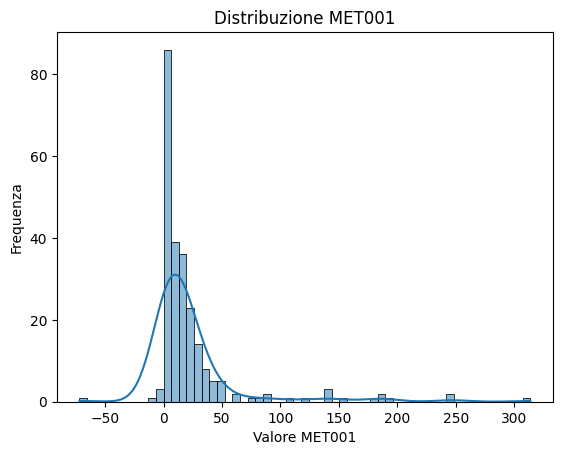

In [ ]:
# Test di Quality con MET001 e MET002 + controllo normalità (con verifica dimensione dati)
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Filtra i KPI anonimi
df_first = df_synthetic[df_synthetic ['MetricName_Anon'].isin(['MET001', 'MET002'])]
df_pivot = df_first.pivot_table(
    index=['YearMonth', 'EntityId_Anon'],
    columns='MetricName_Anon',
    values='Actual'
).dropna()

# --------------------------
# CONTROLLO NUMERO MINIMO DI DATI
min_samples = 20  # Soglia minima consigliata per Shapiro-Wilk
if len(df_pivot) < min_samples:
    print(f"⚠️ Attenzione: Solo {len(df_pivot)} campioni disponibili (minimo consigliato: {min_samples})")
    print("Il test di normalità potrebbe non essere affidabile.")
else:
    print(f"✅ Dati sufficienti: {len(df_pivot)} campioni (minimo richiesto: {min_samples})")

    # Verifica normalità KPI1 (MET001)
    if 'MET001' in df_pivot.columns:
        stat, p_value = shapiro(df_pivot['MET001'])
        print(f"\nShapiro-Wilk Test per MET001: statistic={stat:.4f}, p-value={p_value:.4f}")
        if p_value > 0.05:
            print("✅ I dati di MET001 sono distribuiti normalmente (p > 0.05)")
        else:
            print("❌ I dati di MET001 NON sono distribuiti normalmente (p ≤ 0.05)")

        # Plot distribuzione
        sns.histplot(df_pivot['MET001'], kde=True)
        plt.title(f"Distribuzione MET001")
        plt.xlabel("Valore MET001")
        plt.ylabel('Frequenza')
        plt.show()
    else:
        print("❌ KPI1 (MET001) non presente nei dati filtrati")
# --------------------------

In [ ]:
#analisi di test non parametrici tra MET001 e MET002
from scipy.stats import spearmanr
pd.set_option('display.max_rows', None)  # Mostra tutte le righe
pd.set_option('display.max_columns', None)

# Calcolo della correlazione di Spearman
corr, pval = spearmanr(df_pivot['MET001'], df_pivot['MET002'])
print(f"Spearman correlation: {corr:.4f}, p-value: {pval:.4f}")


Spearman correlation: 0.5761, p-value: 0.0000


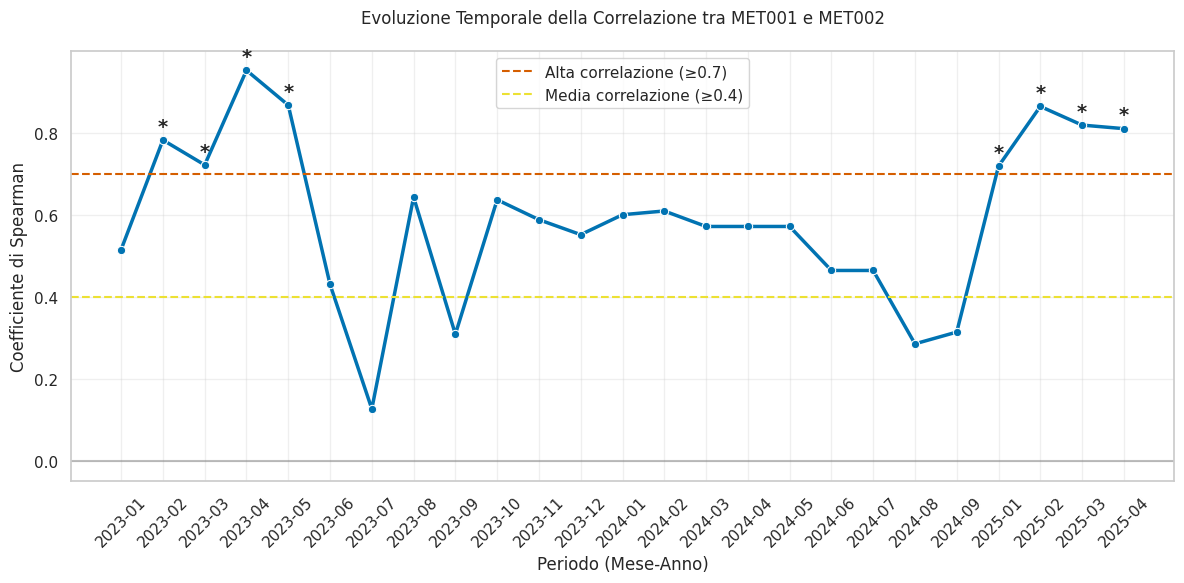

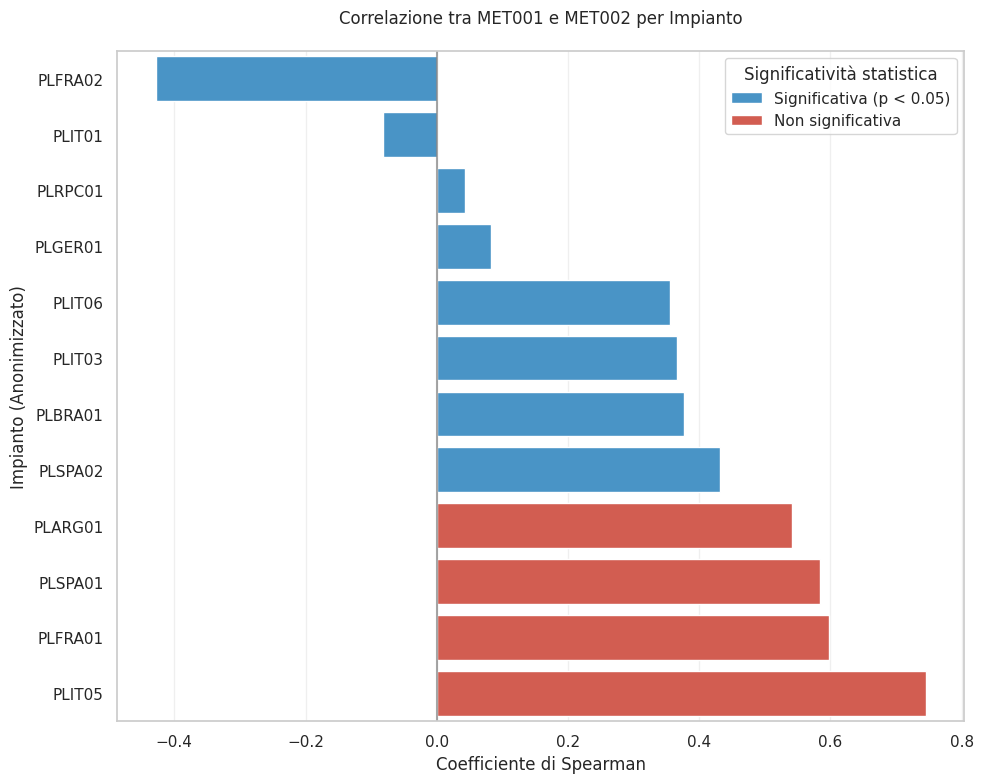

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Configurazione display e stile grafici
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", palette="colorblind")

# Soglie per classificazione della correlazione
high_corr_threshold = 0.7
low_corr_threshold = 0.4

def classify_corr(value):
    if abs(value) >= high_corr_threshold:
        return 'alta'
    elif abs(value) >= low_corr_threshold:
        return 'media'
    else:
        return 'bassa'

# Pivottaggio con controllo qualità
pivot_df = (df_first
            .pivot_table(index=['YearMonth', 'EntityId_Anon'],
                         columns='MetricName_Anon',
                         values='Actual')
            .dropna(subset=['MET001', 'MET002']))  # MET001 , MET002

pivot_df = pivot_df.reset_index()

# Conversione YearMonth in Period (per ordinamento temporale corretto)
pivot_df['YearMonth_Period'] = pivot_df['YearMonth'].apply(lambda x: pd.Period(x, freq="M"))

# 1. ANALISI TEMPORALE (MENSILE)
results_by_month = []
for period, group in pivot_df.groupby('YearMonth_Period'):
    if len(group) >= 5:  # almeno 5 coppie per affidabilità
        corr, p = spearmanr(group['MET002'], group['MET001'])
        results_by_month.append((period, round(corr, 4), round(p, 4)))

# Trasforma in DataFrame ordinato
results_df = pd.DataFrame(results_by_month, columns=['Month_Period', 'Spearman_corr', 'p_value'])
results_df = results_df.sort_values('Month_Period')

# Aggiungi colonna stringa formattata per il grafico
results_df['Month'] = results_df['Month_Period'].dt.strftime("%Y-%m")

# Grafico evoluzione temporale della correlazione
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=results_df, x='Month', y='Spearman_corr',
                 marker='o', linewidth=2.5)
plt.axhline(y=high_corr_threshold, color='r', linestyle='--',
           label=f'Alta correlazione (≥{high_corr_threshold})')
plt.axhline(y=low_corr_threshold, color='y', linestyle='--',
           label=f'Media correlazione (≥{low_corr_threshold})')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Asterischi solo per correlazioni >= 0.7 E significative
for i, row in results_df.iterrows():
    if row['p_value'] < 0.05 and abs(row['Spearman_corr']) >= high_corr_threshold:
        # Usa la posizione corretta sull'asse x
        x_pos = list(results_df['Month']).index(row['Month'])
        ax.text(x_pos, row['Spearman_corr'] + 0.02, '*', ha='center', fontsize=14, fontweight='bold')

plt.title('Evoluzione Temporale della Correlazione tra MET001 e MET002', pad=20)
plt.ylabel('Coefficiente di Spearman')
plt.xlabel('Periodo (Mese-Anno)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlazione_temporale.png', dpi=300)
plt.show()

# 2. ANALISI PER IMPIANTO
results_by_plant = []
for plant, group in pivot_df.groupby('EntityId_Anon'):
    if len(group) >= 5:
        corr, p = spearmanr(group['MET002'], group['MET001'])
        results_by_plant.append((plant, round(corr, 4), round(p, 4)))

results_plant_df = pd.DataFrame(results_by_plant, columns=['Plant', 'Spearman_corr', 'p_value'])
results_plant_df['Significant'] = results_plant_df['p_value'] < 0.05
results_plant_df = results_plant_df.sort_values('Spearman_corr')

# Grafico a barre orizzontali per impianto
plt.figure(figsize=(10, 8))
sns.barplot(data=results_plant_df,
           x='Spearman_corr', y='Plant',
           hue='Significant', dodge=False,
           palette={True: '#e74c3c', False: '#3498db'})

plt.axvline(x=0, color='gray', linestyle='-', alpha=0.7)
plt.title('Correlazione tra MET001 e MET002 per Impianto', pad=20)
plt.xlabel('Coefficiente di Spearman')
plt.ylabel('Impianto (Anonimizzato)')

# Personalizza legenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Significativa (p < 0.05)', 'Non significativa'],
           title='Significatività statistica')

plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('correlazione_impianti.png', dpi=300)
plt.show()

In [ ]:
# ANALISI CON LAG TEMPORALE (MET001_t vs MET002_t+1) - SENZA GRAFICI
# ------------------------------------------------------------

import pandas as pd
from scipy.stats import spearmanr

# Assicuriamoci che YearMonth sia stringa
pivot_df['YearMonth'] = pivot_df['YearMonth'].astype(str)

# Converte YearMonth (es. "2023-1") in periodo mensile
pivot_df['YearMonth_Period'] = pivot_df['YearMonth'].apply(lambda x: pd.Period(x, freq="M"))

# Calcola il mese successivo
pivot_df['Next_Month'] = pivot_df['YearMonth_Period'] + 1

# Crea due DataFrame distinti con metriche anonimizzate
adpu_df = pivot_df[['EntityId_Anon', 'YearMonth_Period', 'MET001']].rename(
    columns={'YearMonth_Period': 'Target_Month', 'MET001': 'MET001_t+1'})

cpa_df = pivot_df[['EntityId_Anon', 'Next_Month', 'MET002']].rename(
    columns={'Next_Month': 'Target_Month', 'MET002': 'MET002_t'})

# Merge MET001 mese t con MET002 mese t+1
lag_df = pd.merge(adpu_df, cpa_df, on=['EntityId_Anon', 'Target_Month'], how='inner')

# Rimuovi eventuali null residui
lag_df.dropna(subset=['MET002_t', 'MET001_t+1'], inplace=True)

# 1. Calcolo correlazione lag temporale globale
corr_lag, p_lag = spearmanr(lag_df['MET002_t'], lag_df['MET001_t+1'])

print(f"📊 Spearman con lag temporale (MET002_t → MET001_t+1):")
print(f"Correlazione globale = {corr_lag:.4f}, p-value = {p_lag:.4f}\n")


📊 Spearman con lag temporale (MET002_t → MET001_t+1):
Correlazione globale = 0.5565, p-value = 0.0000



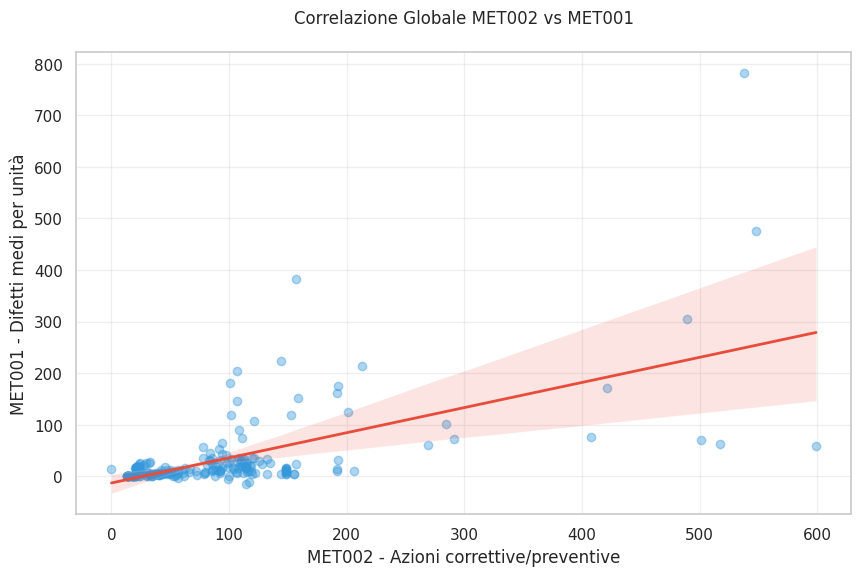

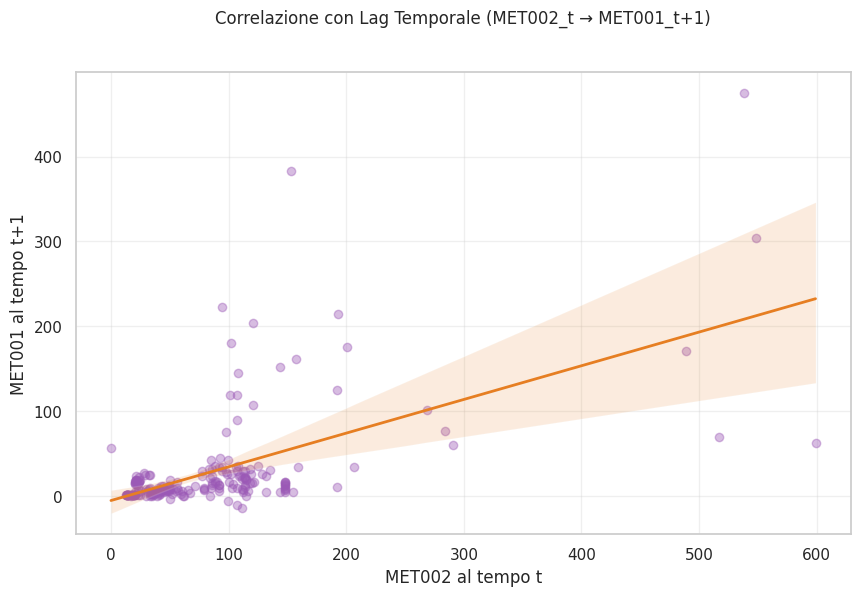

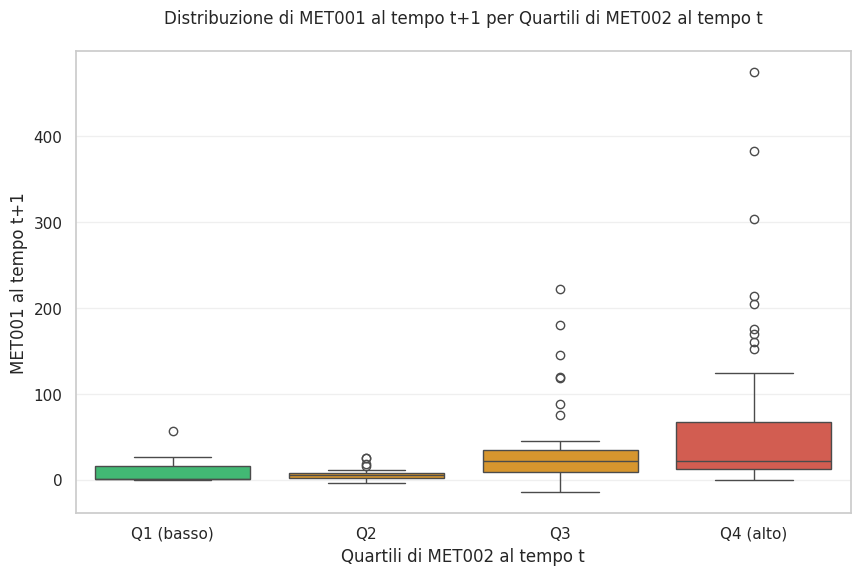

In [ ]:
# =============================================
# GRAFICI MANCANTI PER REPORT (sezione 2 e 5)
# =============================================
from scipy import stats  # Aggiunto import mancante

# --------------------------
# SEZIONE 2: CORRELAZIONE GLOBALE (scatterplot con regressione)
plt.figure(figsize=(10, 6))
sns.regplot(x='MET002', y='MET001', data=pivot_df,
           scatter_kws={'alpha': 0.4, 'color': '#3498db'},
           line_kws={'color': '#e74c3c', 'lw': 2})

# Calcola correlazione globale
corr_glob, p_glob = spearmanr(pivot_df['MET002'], pivot_df['MET001'])
plt.title(f'Correlazione Globale MET002 vs MET001\n')
plt.xlabel('MET002 - Azioni correttive/preventive')
plt.ylabel('MET001 - Difetti medi per unità')
plt.grid(True, alpha=0.3)

# # Aggiungi annotazione con interpretazione
# plt.tight_layout()
# plt.savefig('correlazione_globale.png', dpi=300)
# plt.show()

# --------------------------
# SEZIONE 5: ANALISI CON LAG TEMPORALE (GRAFICI)
# 1. Scatterplot con lag
plt.figure(figsize=(10, 6))
sns.regplot(x='MET002_t', y='MET001_t+1', data=lag_df,
           scatter_kws={'alpha': 0.4, 'color': '#9b59b6'},
           line_kws={'color': '#e67e22', 'lw': 2})

plt.title(f'Correlazione con Lag Temporale (MET002_t → MET001_t+1)\n', pad=20)
plt.xlabel('MET002 al tempo t')
plt.ylabel('MET001 al tempo t+1')
plt.grid(True, alpha=0.3)


# 2. Boxplot per quartili di MET002_t (versione corretta)
lag_df['MET002_quartile'] = pd.qcut(lag_df['MET002_t'], q=4,
                                  labels=['Q1 (basso)', 'Q2', 'Q3', 'Q4 (alto)'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='MET002_quartile', y='MET001_t+1', data=lag_df,
           palette=['#2ecc71', '#f39c12', '#f39c12', '#e74c3c'],
           hue='MET002_quartile',  # Aggiunto per risolvere warning
           dodge=False,  # Evita separazione delle barre
           legend=False)  # Nasconde legenda ridondante

plt.title('Distribuzione di MET001 al tempo t+1 per Quartili di MET002 al tempo t', pad=20)
plt.xlabel('Quartili di MET002 al tempo t')
plt.ylabel('MET001 al tempo t+1')
plt.grid(True, axis='y', alpha=0.3)

# Aggiungi significatività statistica tra Q1 e Q4
q1_data = lag_df[lag_df['MET002_quartile'] == 'Q1 (basso)']['MET001_t+1']
q4_data = lag_df[lag_df['MET002_quartile'] == 'Q4 (alto)']['MET001_t+1']
_, p_val = stats.mannwhitneyu(q1_data, q4_data, alternative='two-sided')


# 3. Grafico aggiuntivo: evoluzione correlazione con lag temporale
if 'monthly_df' in locals() and len(monthly_df) > 3:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_df, x='Month', y='Spearman_corr',
                marker='o', linewidth=2.5, color='#3498db')

    plt.axhline(y=high_corr_threshold, color='r', linestyle='--',
               label=f'Alta correlazione (≥{high_corr_threshold})')
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

    plt.title('Evoluzione della Correlazione con Lag Temporale', pad=20)
    plt.ylabel('Coefficiente Spearman ρ (MET002_t → MET001_t+1)')
    plt.xlabel('Mese di riferimento')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('lag_temporale_evoluzione.png', dpi=300)
    plt.show()

**SAFETY**

Shapiro-Wilk Test per IFI: statistic=0.8949, p-value=0.0000
❌ I dati di MET003 NON sono distribuiti normalmente (p ≤ 0.05)


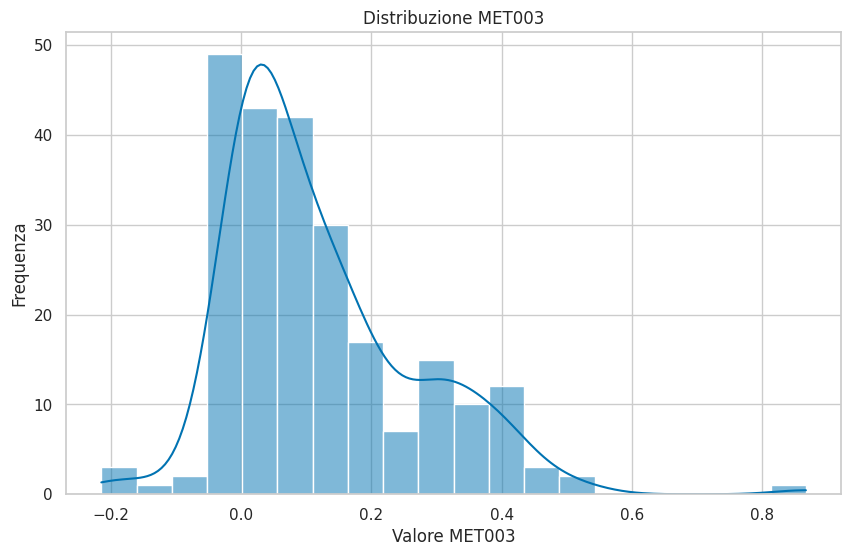

In [ ]:
#Secondo Test di Safety con MET003 e MET002, + controllo normalità dei dati
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Mostra tutte le righe
pd.set_option('display.max_columns', None)


df_filtered = df_synthetic[df_synthetic ['MetricName_Anon'].isin(['MET002', 'MET003'])]
# display(df_filtered)

# Pivot per avere colonne separate MET003 e MET002
df_pivot = df_filtered.pivot_table(
    index=['YearMonth', 'EntityId_Anon'],
    columns='MetricName_Anon',
    values='Actual'
).dropna()

# Verifica normalità MET003 (Safety)
stat, p = shapiro(df_pivot['MET003'])
print(f"Shapiro-Wilk Test per MET003: statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✅ I dati di MET003 sono distribuiti normalmente (p > 0.05)")
else:
    print("❌ I dati di MET003 NON sono distribuiti normalmente (p ≤ 0.05)")

# Istogramma distribuzione
plt.figure()
sns.histplot(df_pivot['MET003'], kde=True, bins=20)
plt.title('Distribuzione MET003')
plt.xlabel('Valore MET003')
plt.ylabel('Frequenza')
plt.show()


In [ ]:
#analisi di test non parametrici tra MEt003 e MET002
from scipy.stats import spearmanr
pd.set_option('display.max_rows', None)  # Mostra tutte le righe
pd.set_option('display.max_columns', None)

# Calcolo della correlazione di Spearman
corr, pval = spearmanr(df_pivot['MET003'], df_pivot['MET002'])
print(f"Spearman correlation: {corr:.4f}, p-value: {pval:.4f}")


Spearman correlation: 0.0488, p-value: 0.4551


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr


df_pivot_ifi = df_pivot.reset_index()
# Converte in Period (mensile)
df_pivot_ifi['Month'] = df_pivot_ifi['YearMonth'].apply(lambda x: pd.Period(x, freq="M"))
df_pivot_ifi['Next_Month'] = df_pivot_ifi['Month'] + 1

# ----------------------------------------------------------------------------------
# Merge MET003 (t) con MET002 (t+1)
# ----------------------------------------------------------------------------------
met003_df = df_pivot_ifi[['EntityId_Anon', 'Month', 'MET003']].rename(
    columns={'Month': 'Target_Month', 'MET003': 'MET003_t'}
)
met002_df = df_pivot_ifi[['EntityId_Anon', 'Next_Month', 'MET002']].rename(
    columns={'Next_Month': 'Target_Month', 'MET002': 'MET002_t+1'}
)

lag_df = pd.merge(met003_df, met002_df, on=['EntityId_Anon', 'Target_Month'], how='inner')

# ----------------------------------------------------------------------------------
# Calcolo globale
# ----------------------------------------------------------------------------------
global_df = lag_df.dropna(subset=['MET003_t', 'MET002_t+1']).copy()
global_df = global_df[
    (global_df.groupby('EntityId_Anon')['MET003_t'].transform('std') != 0) &
    (global_df.groupby('EntityId_Anon')['MET002_t+1'].transform('std') != 0)
]

corr_global, p_global = spearmanr(global_df['MET003_t'], global_df['MET002_t+1'])
print(f"🌍 CORRELAZIONE GLOBALE (MET003_t → MET002_t+1):")
print(f"Spearman = {corr_global:.3f}, p-value = {p_global:.4f}")
print(f"Osservazioni utilizzate: {len(global_df)}")


🌍 CORRELAZIONE GLOBALE (MET003_t → MET002_t+1):
Spearman = 0.057, p-value = 0.4095
Osservazioni utilizzate: 213


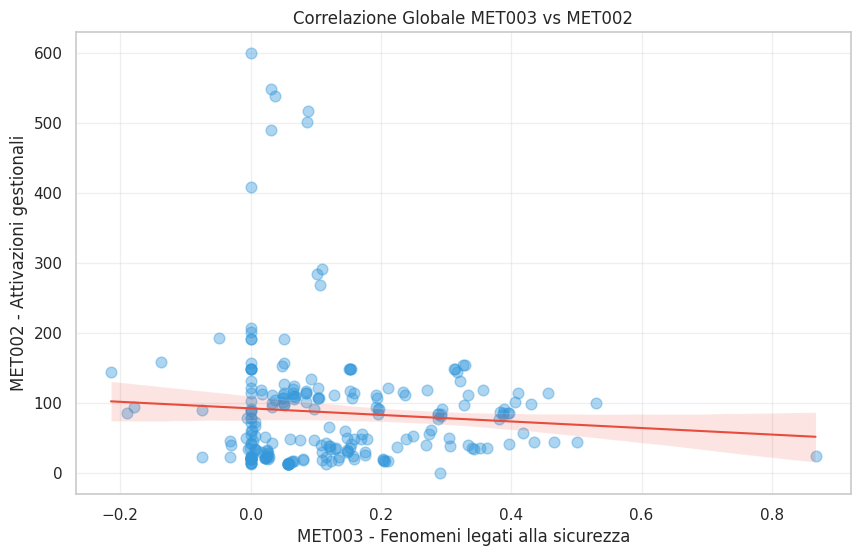

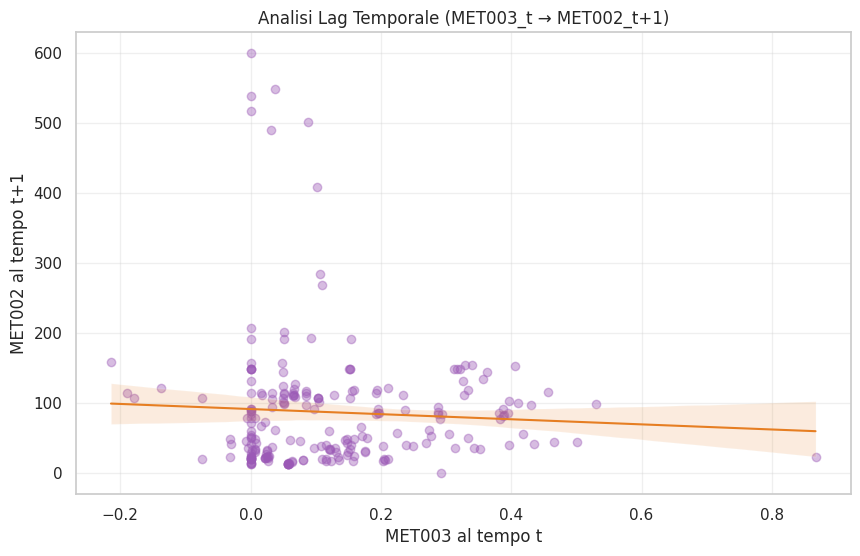

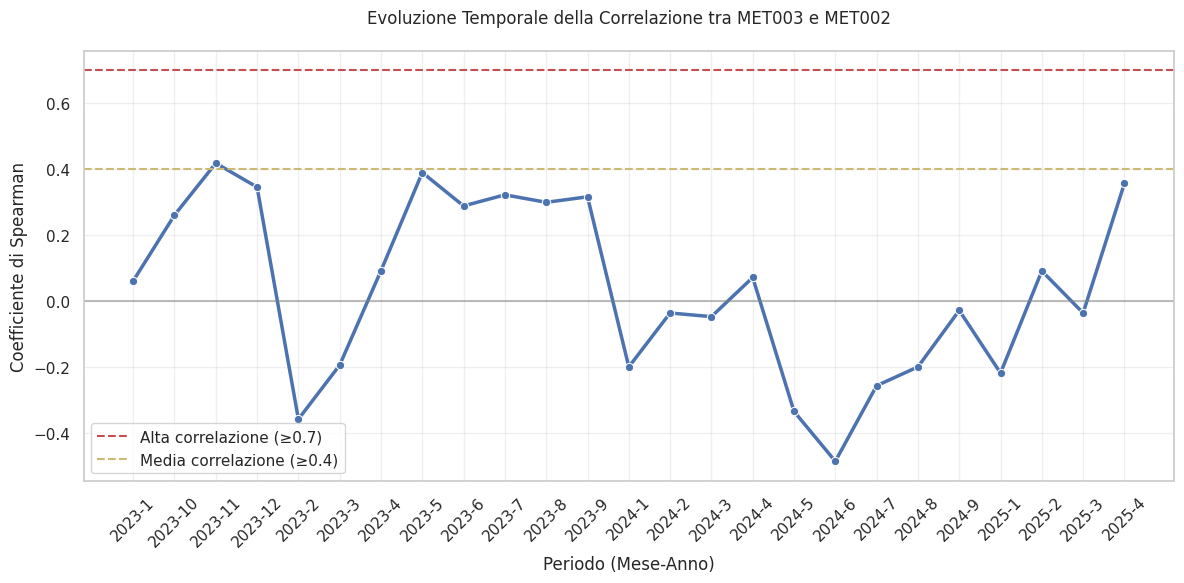

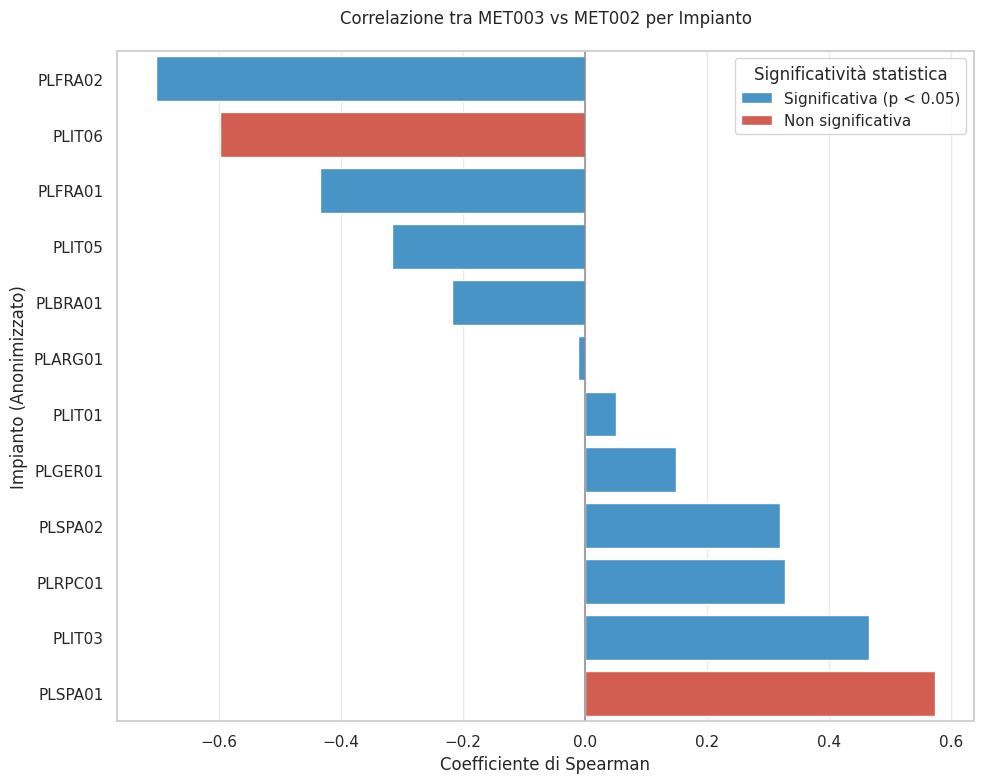

In [ ]:
# =============================================
# ANALISI SAFETY CON METRICHE ANONIMIZZATE
# =============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr, shapiro

# Configurazione - versione corretta
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# --------------------------------------------------
# 2. CORRELAZIONE GLOBALE (MET003 vs MET002)
# --------------------------------------------------
def plot_global_correlation(df):
    """Grafico scatterplot con regressione"""
    corr, pval = spearmanr(df['MET003'], df['MET002'])

    plt.figure()
    ax = sns.regplot(x='MET003', y='MET002', data=df,
                    scatter_kws={'alpha':0.4, 's':60, 'color':'#3498db'},
                    line_kws={'color':'#e74c3c', 'lw':1.5})

    sig_level = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "(ns)"
    ax.set_title(f"Correlazione Globale MET003 vs MET002")
    ax.set_xlabel('MET003 - Fenomeni legati alla sicurezza')
    ax.set_ylabel('MET002 - Attivazioni gestionali')
    ax.grid(True, alpha=0.3)

plot_global_correlation(df_pivot.reset_index())

# --------------------------------------------------
# 3. ANALISI CON LAG TEMPORALE (MET003_t → MET002_t+1)
# --------------------------------------------------
def plot_lag_analysis(df):
    """Analisi con lag temporale di 1 periodo"""
    df_lag = df.reset_index().sort_values(['EntityId_Anon', 'YearMonth'])
    df_lag['MET002_t+1'] = df_lag.groupby('EntityId_Anon')['MET002'].shift(-1)
    df_lag = df_lag.dropna(subset=['MET003', 'MET002_t+1'])

    corr, pval = spearmanr(df_lag['MET003'], df_lag['MET002_t+1'])

    plt.figure()
    ax = sns.regplot(x='MET003', y='MET002_t+1', data=df_lag,
                    scatter_kws={'alpha':0.4, 'color':'#9b59b6'},
                    line_kws={'color':'#e67e22', 'lw':1.5})

    sig_level = " (ns)" if pval >= 0.05 else "*"
    ax.set_title(f"Analisi Lag Temporale (MET003_t → MET002_t+1)")
    ax.set_xlabel('MET003 al tempo t')
    ax.set_ylabel('MET002 al tempo t+1')
    ax.grid(True, alpha=0.3)

plot_lag_analysis(df_pivot)

# --------------------------------------------------
# 4. ANALISI MENSILE TEMPORALE SAFETY (MET003 vs MET002)
# --------------------------------------------------
def plot_monthly_correlation_safety(pivot_df, high_corr_threshold=0.7, low_corr_threshold=0.4):
    results_by_month = []

    for period, group in pivot_df.groupby('YearMonth'):
        if len(group) >= 5:
            corr, p = spearmanr(group['MET002'], group['MET003'])
            results_by_month.append((str(period), round(corr, 4), round(p, 4)))

    results_df = pd.DataFrame(results_by_month, columns=['Month', 'Spearman_corr', 'p_value'])

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=results_df, x='Month', y='Spearman_corr',
                      marker='o', linewidth=2.5)

    plt.axhline(y=high_corr_threshold, color='r', linestyle='--',
                label=f'Alta correlazione (≥{high_corr_threshold})')
    plt.axhline(y=low_corr_threshold, color='y', linestyle='--',
                label=f'Media correlazione (≥{low_corr_threshold})')
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

    for i, row in results_df.iterrows():
        if row['p_value'] < 0.05:
            ax.text(i, row['Spearman_corr'] + 0.02, '*', ha='center', fontsize=14)

    plt.title('Evoluzione Temporale della Correlazione tra MET003 e MET002', pad=20)
    plt.ylabel('Coefficiente di Spearman')
    plt.xlabel('Periodo (Mese-Anno)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('correlazione_temporale_safety.png', dpi=300)
    plt.show()

plot_monthly_correlation_safety(df_pivot.reset_index())

# --------------------------------------------------
# 5. ANALISI PER IMPIANTO
# --------------------------------------------------
def plot_plant_analysis(df):
    plant_corr = []
    for plant, group in df.groupby('EntityId_Anon'):
        if len(group) >= 3:
            rho, p = spearmanr(group['MET003'], group['MET002'])
            plant_corr.append({
                'Plant': plant,
                'Correlation': rho,
                'p_value': p,
                'Significant': p < 0.05
            })

    corr_df = pd.DataFrame(plant_corr).sort_values('Correlation')

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Correlation', y='Plant', data=corr_df,
                    hue='Significant', dodge=False,
                    palette={True: '#e74c3c', False: '#3498db'})

    ax.set_title("Correlazione tra MET003 vs MET002 per Impianto", pad=20)
    ax.set_xlabel('Coefficiente di Spearman')
    ax.set_ylabel('Impianto (Anonimizzato)')
    ax.axvline(0, color='gray', linestyle='-', alpha=0.7)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Significativa (p < 0.05)', 'Non significativa'],
              title='Significatività statistica')

    plt.grid(True, axis='x', alpha=0.4)
    plt.tight_layout()
    plt.savefig('safety_plant_analysis.png', dpi=300)
    plt.show()

plot_plant_analysis(df_pivot.reset_index())


**PEOPLE**

Dati pronti: 309 osservazioni
Metriche presenti: ['MET003', 'MET004']

TEST NORMALITÀ MET004:
Shapiro-Wilk Test per MET004: statistic=0.5650, p-value=0.0000
❌ I dati di MET004 NON sono distribuiti normalmente (p ≤ 0.05)


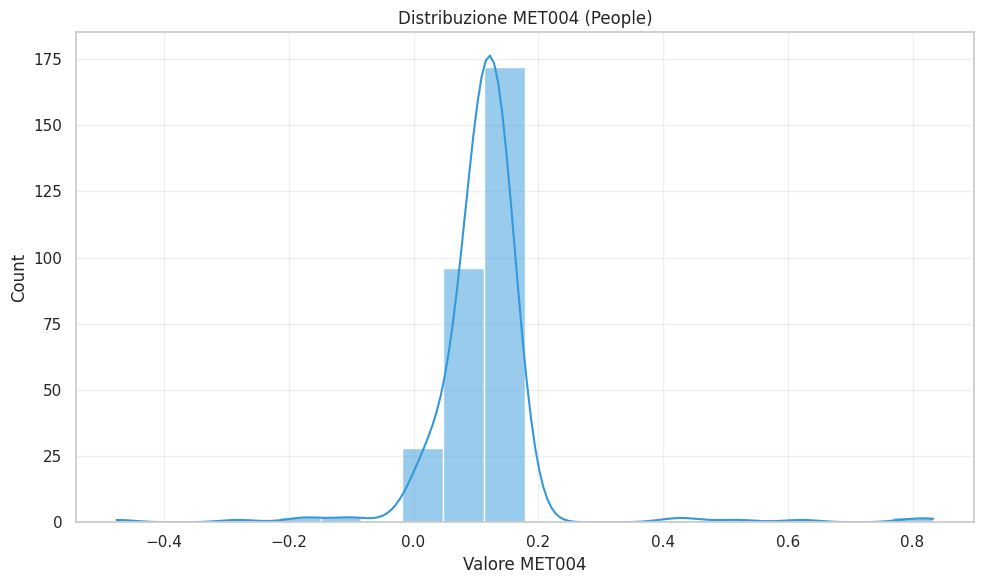

In [ ]:
# ANALISI PEOPLE CON MET003 E MET004 (VERSIONE FINALE)
import pandas as pd
from scipy.stats import shapiro, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Configurazione grafica uniforme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]  # Dimensioni standard
plt.rcParams['font.size'] = 12
COLOR_SCATTER = '#3498db'  # Azzurro per i punti
COLOR_LINE = '#e74c3c'     # Rosso per la linea di regressione

# -------------------------------------------------------------------
# 1. PREPARAZIONE DATI (ANONIMIZZATA)
# -------------------------------------------------------------------
try:
    df_filtered = df_synthetic[df_synthetic['MetricName_Anon'].isin(['MET003', 'MET004'])]
    df_pivot = df_filtered.pivot_table(
        index=['YearMonth', 'EntityId_Anon'],
        columns='MetricName_Anon',
        values='Actual'
    ).dropna()

    print(f"Dati pronti: {len(df_pivot)} osservazioni")
    print(f"Metriche presenti: {df_pivot.columns.tolist()}")

except Exception as e:
    print(f"Errore preparazione dati: {str(e)}")
    exit()

# -------------------------------------------------------------------
# 2. ANALISI DISTRIBUZIONE MET004
# -------------------------------------------------------------------
if 'MET004' in df_pivot.columns:
    stat, p = shapiro(df_pivot['MET004'])
    print("\nTEST NORMALITÀ MET004:")
    print(f"Shapiro-Wilk Test per MET004: statistic={stat:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print("✅ I dati di MET004 sono distribuiti normalmente (p > 0.05)")
    else:
        print("❌ I dati di MET004 NON sono distribuiti normalmente (p ≤ 0.05)")

    plt.figure()
    sns.histplot(df_pivot['MET004'], kde=True, bins=20, color=COLOR_SCATTER)
    plt.title('Distribuzione MET004 (People)')
    plt.xlabel('Valore MET004')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [ ]:
#analisi di test non parametrici tra MET003 e MET004
from scipy.stats import spearmanr
# pd.set_option('display.max_rows', None)  # Mostra tutte le righe
# pd.set_option('display.max_columns', None)

# Calcolo della correlazione di Spearman
corr, pval = spearmanr(df_pivot['MET004'], df_pivot['MET003'])
print(f"Spearman correlation: {corr:.4f}, p-value: {pval:.4f}")


Spearman correlation: 0.0652, p-value: 0.2530


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# ----------------------------------------------------------
# ANALISI CON LAG TEMPORALE (MET003_t → MET004_t+1)
# ----------------------------------------------------------

# ✅ Conversione YearMonth in Period (formato mensile)
pivot_df = df_pivot.reset_index()
pivot_df['Month'] = pivot_df['YearMonth'].apply(lambda x: pd.Period(str(x), freq="M"))
pivot_df['Next_Month'] = pivot_df['Month'] + 1

# Crea DataFrame separati con nomi anonimizzati
met004_df = pivot_df[['EntityId_Anon', 'Month', 'MET004']].rename(
    columns={'Month': 'Target_Month', 'MET004': 'MET004_t+1'}
)

met003_df = pivot_df[['EntityId_Anon', 'Next_Month', 'MET003']].rename(
    columns={'Next_Month': 'Target_Month', 'MET003': 'MET003_t'}
)

# Unisci i dati
lag_df = pd.merge(met004_df, met003_df,
                 on=['EntityId_Anon', 'Target_Month'],
                 how='inner')

# Pulisci i dati
lag_df.dropna(subset=['MET003_t', 'MET004_t+1'], inplace=True)

# Calcola correlazione con lag
corr_lag, p_lag = spearmanr(lag_df['MET003_t'], lag_df['MET004_t+1'])

# Output risultati
print("📊 RISULTATI CON LAG TEMPORALE")
print("-"*40)
print(f"MET003_t → MET004_t+1")
print(f"Correlazione (ρ): {corr_lag:.4f}")
print(f"p-value: {p_lag:.4f}")
print(f"Osservazioni: {len(lag_df)}")

# Interpretazione base
if p_lag < 0.05:
    print("\n✅ Correlazione significativa (p < 0.05)")
else:
    print("\n❌ Nessuna correlazione significativa (p ≥ 0.05)")


📊 RISULTATI CON LAG TEMPORALE
----------------------------------------
MET003_t → MET004_t+1
Correlazione (ρ): 0.0245
p-value: 0.6831
Osservazioni: 281

❌ Nessuna correlazione significativa (p ≥ 0.05)


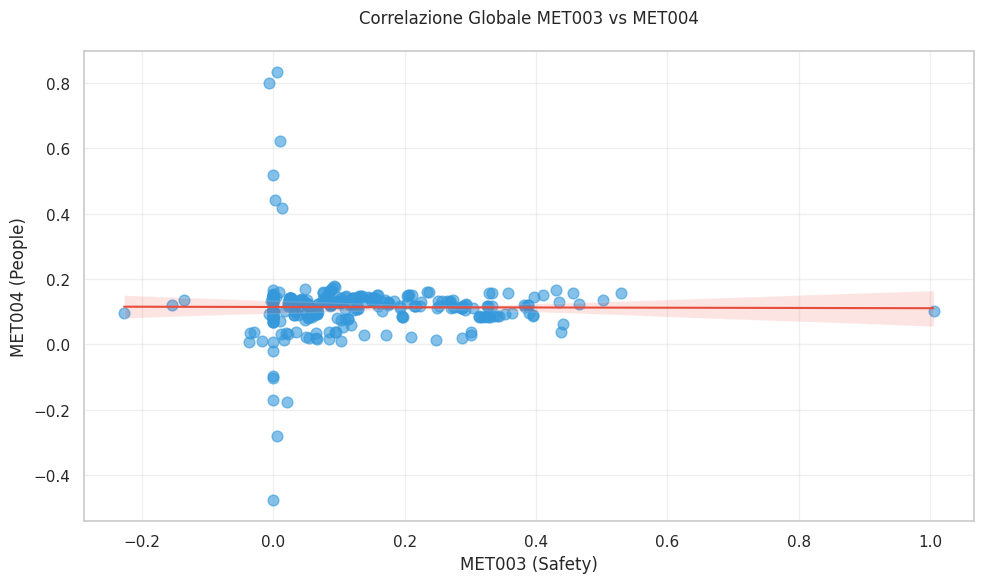

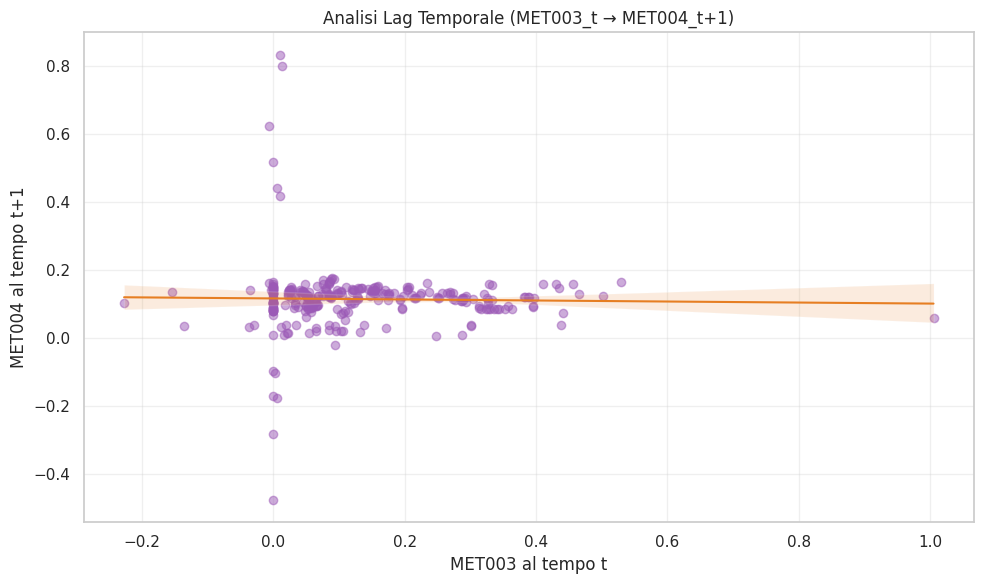

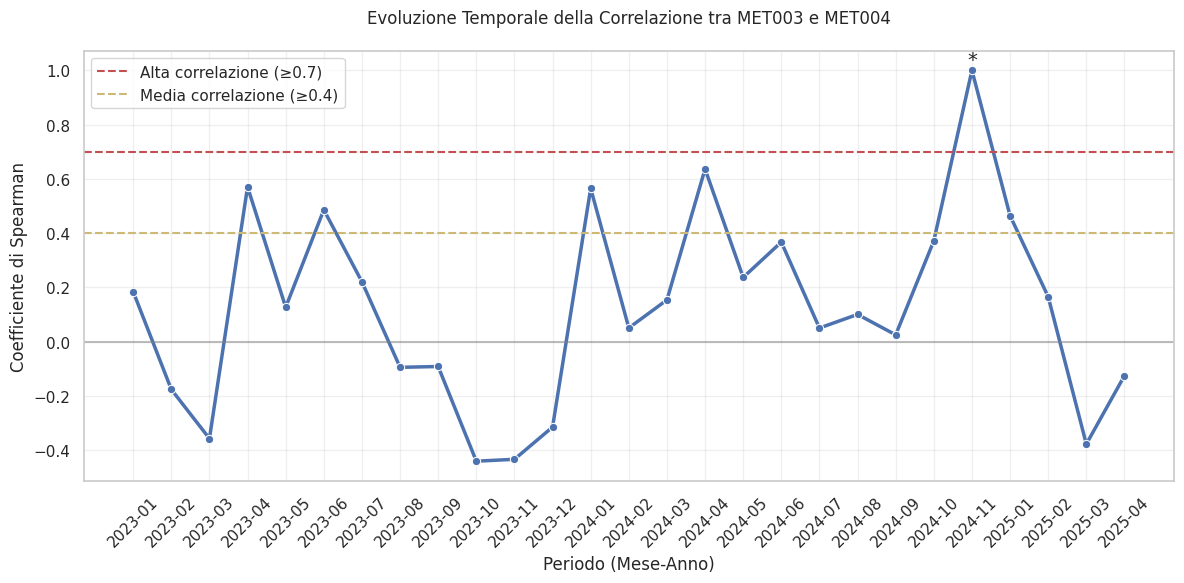

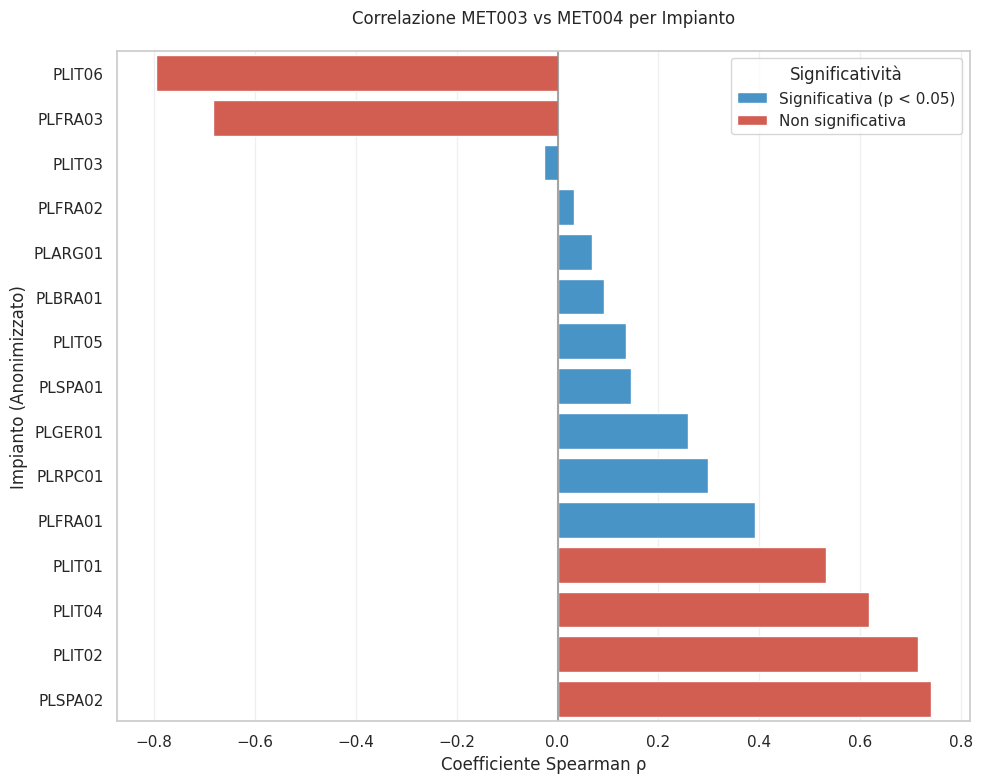

In [ ]:
# =============================================
# ANALISI MET003 (SAFETY) vs MET004 (PEOPLE)
# =============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr, shapiro

# Configurazione grafica uniforme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Palette coerente
COLOR_SCATTER = '#3498db'  # Azzurro per punti
COLOR_LINE = '#e74c3c'     # Rosso per linee
COLOR_HIGH = '#e74c3c'     # Rosso per alta correlazione
COLOR_MED = '#f39c12'      # Arancione per media correlazione
COLOR_LOW = '#2ecc71'      # Verde per bassa correlazione


df_pivot = df_pivot.reset_index()
df_pivot['Month'] = df_pivot['YearMonth'].apply(lambda x: pd.Period(str(x), freq="M"))
# --------------------------------------------------
# 2. CORRELAZIONE GLOBALE (MET003 vs MET004)
# --------------------------------------------------
def plot_global_correlation(df):
    corr, pval = spearmanr(df['MET003'], df['MET004'])

    plt.figure()
    ax = sns.regplot(
        x='MET003',
        y='MET004',
        data=df,
        scatter_kws={'alpha':0.6, 's':60, 'color':COLOR_SCATTER},
        line_kws={'color':COLOR_LINE, 'lw':1.5}
    )

    title = f"Correlazione Globale MET003 vs MET004"

    ax.set_title(title, pad=20)
    ax.set_xlabel('MET003 (Safety)')
    ax.set_ylabel('MET004 (People)')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('correlazione_globale_MET003_MET004.png', dpi=300)
    plt.show()

plot_global_correlation(df_pivot)

# --------------------------------------------------
# 3. ANALISI CON LAG TEMPORALE (MET003_t → MET004_t+1)
# --------------------------------------------------
def plot_lag_analysis(df):
    df_lag = df.reset_index().sort_values(['EntityId_Anon', 'YearMonth'])
    df_lag['MET004_t+1'] = df_lag.groupby('EntityId_Anon')['MET004'].shift(-1)
    df_lag = df_lag.dropna(subset=['MET003', 'MET004_t+1'])

    corr, pval = spearmanr(df_lag['MET003'], df_lag['MET004_t+1'])

    plt.figure()
    ax = sns.regplot(
        x='MET003',
        y='MET004_t+1',
        data=df_lag,
        scatter_kws={'alpha':0.5, 'color':'#9b59b6'},
        line_kws={'color':'#e67e22', 'lw':1.5}
    )

    ax.set_title(f"Analisi Lag Temporale (MET003_t → MET004_t+1)")
    ax.set_xlabel('MET003 al tempo t')
    ax.set_ylabel('MET004 al tempo t+1')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('lag_analysis_MET003_MET004.png', dpi=300)
    plt.show()

plot_lag_analysis(df_pivot)

# --------------------------------------------------
# 4. ANALISI MENSILE TEMPORALE (VERSIONE SEMPLIFICATA)
# --------------------------------------------------
def plot_monthly_trend_simple(df):
    monthly_corr = []
    for month, group in df.groupby('Month'):
        if len(group) >= 3:
            rho, p = spearmanr(group['MET003'], group['MET004'])
            monthly_corr.append({
                'Month': str(month),
                'Correlation': rho,
                'p_value': p
            })

    monthly_df = pd.DataFrame(monthly_corr).sort_values("Month")

    HIGH_CORR = 0.7
    LOW_CORR = 0.4

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        data=monthly_df,
        x='Month',
        y='Correlation',
        marker='o',
        linewidth=2.5
    )

    ax.axhline(y=HIGH_CORR, color='r', linestyle='--', label=f'Alta correlazione (≥{HIGH_CORR})')
    ax.axhline(y=LOW_CORR, color='y', linestyle='--', label=f'Media correlazione (≥{LOW_CORR})')
    ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

    for i, row in monthly_df.iterrows():
        if row['p_value'] < 0.05 and row['Correlation'] >= HIGH_CORR:
            ax.text(i, row['Correlation'] + 0.02, '*', ha='center', fontsize=14)

    plt.title('Evoluzione Temporale della Correlazione tra MET003 e MET004', pad=20)
    plt.ylabel('Coefficiente di Spearman')
    plt.xlabel('Periodo (Mese-Anno)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('monthly_trend_simple_MET003_MET004.png', dpi=300)
    plt.show()

plot_monthly_trend_simple(df_pivot)

# --------------------------------------------------
# 5. ANALISI PER IMPIANTO
# --------------------------------------------------
def plot_plant_analysis(df):
    plant_corr = []
    for plant, group in df.groupby('EntityId_Anon'):
        if len(group) >= 3:
            rho, p = spearmanr(group['MET003'], group['MET004'])
            plant_corr.append({
                'Plant': plant,
                'Correlation': rho,
                'p_value': p,
                'Significant': p < 0.05
            })

    corr_df = pd.DataFrame(plant_corr).sort_values('Correlation')

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(
        x='Correlation',
        y='Plant',
        data=corr_df,
        hue='Significant',
        dodge=False,
        palette={True: COLOR_HIGH, False: COLOR_SCATTER}
    )

    ax.set_title("Correlazione MET003 vs MET004 per Impianto", pad=20)
    ax.set_xlabel('Coefficiente Spearman ρ')
    ax.set_ylabel('Impianto (Anonimizzato)')
    ax.axvline(0, color='gray', linestyle='-', alpha=0.7)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Significativa (p < 0.05)', 'Non significativa'],
              title='Significatività')

    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('plant_analysis_MET003_MET004.png', dpi=300)
    plt.show()

plot_plant_analysis(df_pivot)

**COST**

Shapiro-Wilk Test - MET007: statistic=0.3139, p-value=0.0000
❌ Distribuzione non normale (p ≤ 0.05)


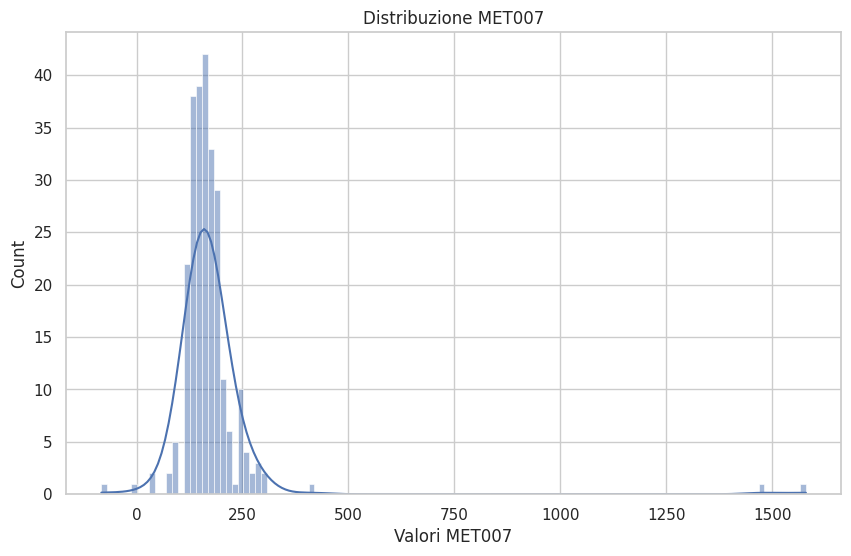

In [ ]:
# Test per analisi metriche produttività   per COST
# Verifica distribuzione normalità e analisi correlazione
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_filtered = df_synthetic[df_synthetic['MetricName_Anon'].isin(['MET007', 'MET001'])]

# Ristruttura dati in formato pivot
df_pivot = df_filtered.pivot_table(
    index=['YearMonth', 'EntityId_Anon'],
    columns='MetricName_Anon',
    values='Actual'
).dropna()

# Test normalità distribuzione MET007
stat, p_value = shapiro(df_pivot['MET007'])

print(f"Shapiro-Wilk Test - MET007: statistic={stat:.4f}, p-value={p_value:.4f}")
if p_value > 0.05:
    print("✅ Distribuzione normale (p > 0.05)")
else:
    print("❌ Distribuzione non normale (p ≤ 0.05)")

# Visualizzazione distribuzione
sns.histplot(df_pivot['MET007'], kde=True)
plt.title("Distribuzione MET007")
plt.xlabel("Valori MET007")
plt.show()

In [ ]:
import statsmodels.formula.api as smf

# Seleziona e prepara i dati per il modello
df_model = df_pivot[['MET001', 'MET007']].dropna()
df_model.columns = ['X_VAR1', 'Y_VAR2']  # Variabili anonimizzate

# Regressione quantile (mediana)
model = smf.quantreg('Y_VAR2 ~ X_VAR1', df_model)
res = model.fit(q=0.5)

# Output del modello
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                 Y_VAR2   Pseudo R-squared:              0.03310
Model:                       QuantReg   Bandwidth:                       24.65
Method:                 Least Squares   Sparsity:                        81.60
Date:                Mon, 29 Sep 2025   No. Observations:                  256
Time:                        06:46:44   Df Residuals:                      254
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    155.5898      2.772     56.134      0.000     150.131     161.048
X_VAR1         0.1184      0.035      3.362      0.001       0.049       0.188


In [ ]:
# Analisi regressione quantile per diversi percentili
percentiles = [0.25, 0.5, 0.75]

for p in percentiles:
    model = smf.quantreg('Y_VAR2 ~ X_VAR1', df_model)
    res = model.fit(q=p)
    print(f"\n--- Analisi percentile {p} ---")
    print(res.summary())


--- Analisi percentile 0.25 ---
                         QuantReg Regression Results                          
Dep. Variable:                 Y_VAR2   Pseudo R-squared:              0.02253
Model:                       QuantReg   Bandwidth:                       21.78
Method:                 Least Squares   Sparsity:                        87.55
Date:                Mon, 29 Sep 2025   No. Observations:                  256
Time:                        06:46:47   Df Residuals:                      254
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    137.6721      2.682     51.337      0.000     132.391     142.953
X_VAR1         0.0997      0.040      2.478      0.014       0.020       0.179

--- Analisi percentile 0.5 ---
                         QuantReg Regression Results              

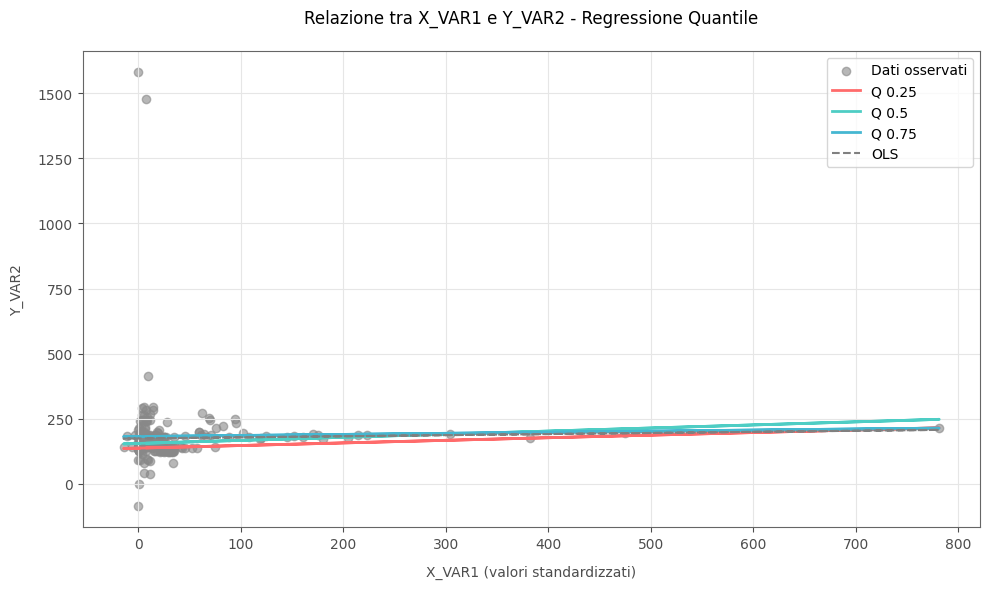

/tmp/ipython-input-1283518267.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefs.append(quant_reg.params[1])  # Coefficiente X_VAR1
/tmp/ipython-input-1283518267.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = sm.QuantReg(y, X).fit(q=q).pvalues[1]
/tmp/ipython-input-1283518267.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = sm.QuantReg(y, X).fit(q=q).pvalues[1]
/tmp/ipython-input-1283518267.py:95: Fut

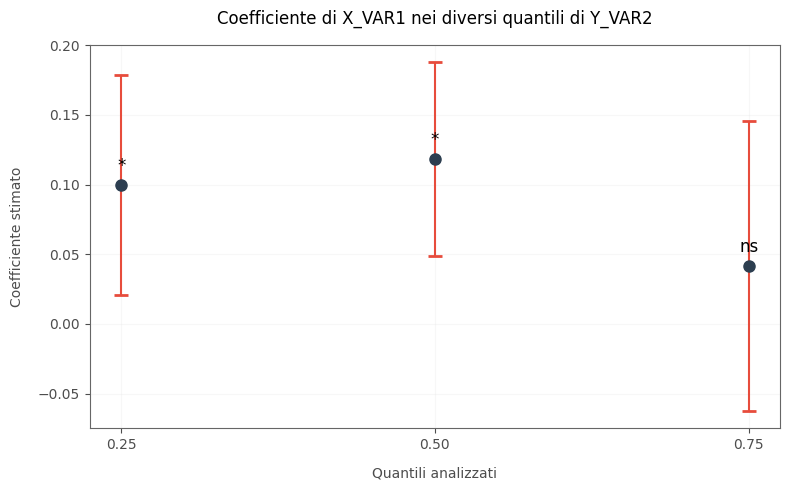

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Imposta lo stile moderno (alternativa a seaborn)
plt.style.use('default')  # Reset allo stile base
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.3',
    'xtick.color': '.3',
    'ytick.color': '.3'
})

# --------------------------------------------------
# GRAFICO 1: REGRESSIONE QUANTILE
# --------------------------------------------------
quantiles = [0.25, 0.5, 0.75]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Scala colori accessibili

# Preparazione dati
x = df_model['X_VAR1']
y = df_model['Y_VAR2']

# Filtro per X < 100
mask = x < 100
x_filtered = x[mask]
y_filtered = y[mask]
X_filtered = sm.add_constant(x_filtered)

X = sm.add_constant(x)  # Aggiunge intercetta

# Regressione OLS (per confronto)
ols = sm.OLS(y, X).fit()
ols_pred = ols.predict(X)

# Plot base
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, alpha=0.6, color='#888888', label='Dati osservati')

# Plot quantili
for q, color in zip(quantiles, colors):
    quant_reg = sm.QuantReg(y, X).fit(q=q)
    ax.plot(x, quant_reg.predict(X), color=color,
            linewidth=2, label=f'Q {q}')

# Linea OLS
ax.plot(x, ols_pred, '--', color='gray', linewidth=1.5, label='OLS')


# Formattazione
ax.set_title('Relazione tra X_VAR1 e Y_VAR2 - Regressione Quantile', pad=20)
ax.set_xlabel('X_VAR1 (valori standardizzati)', labelpad=10)
ax.set_ylabel('Y_VAR2', labelpad=10)
ax.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------------
# GRAFICO 2: COEFFICIENTI PER QUANTILI
# --------------------------------------------------
quantiles = np.array([0.25, 0.5, 0.75])
coefs = []
conf_intervals = []

for q in quantiles:
    quant_reg = sm.QuantReg(y, X).fit(q=q)
    coefs.append(quant_reg.params[1])  # Coefficiente X_VAR1
    conf_intervals.append(quant_reg.conf_int().iloc[1,:])  # IC 95%

# Convert to arrays
coefs = np.array(coefs)
conf_intervals = np.array(conf_intervals)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
error = coefs[:, None] - conf_intervals

ax.errorbar(quantiles, coefs, yerr=np.abs(error.T),
            fmt='o', color='#2C3E50', ecolor='#E74C3C',
            capsize=5, capthick=2, markersize=8)

# Formattazione
ax.set_title('Coefficiente di X_VAR1 nei diversi quantili di Y_VAR2', pad=15)
ax.set_xlabel('Quantili analizzati', labelpad=10)
ax.set_ylabel('Coefficiente stimato', labelpad=10)
ax.set_xticks(quantiles)
ax.grid(alpha=0.3)

# Aggiungi significatività (esempio)
for i, q in enumerate(quantiles):
    pval = sm.QuantReg(y, X).fit(q=q).pvalues[1]
    sig_symbol = '*' if pval < 0.05 else 'ns'
    ax.text(q, coefs[i]+0.01, sig_symbol,
            ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**DELIVERY**


              ANALISI INIZIALE DATI               

📊 Record totali trovati: 996
📌 Breakdown per metrica:
MetricName_Anon
MET008    727
MET002    269
Name: count, dtype: int64

🔍 Campioni validi dopo pivot/dropna: 23
🎯 Dettaglio colonne presenti:
['MET002', 'MET008']

             ANALISI NORMALITÀ MET008             

📐 Statistiche descrittive MET008:
count     23.00
mean      55.77
std       78.39
min      -39.43
25%       24.29
50%       45.04
75%       62.46
max      385.80
Name: MET008, dtype: float64

🧪 Campioni utilizzati per test normalità: 23
Shapiro-Wilk Test - MET008: statistic=0.5990, p-value=0.0000
❌ Distribuzione non normale (p ≤ 0.05)


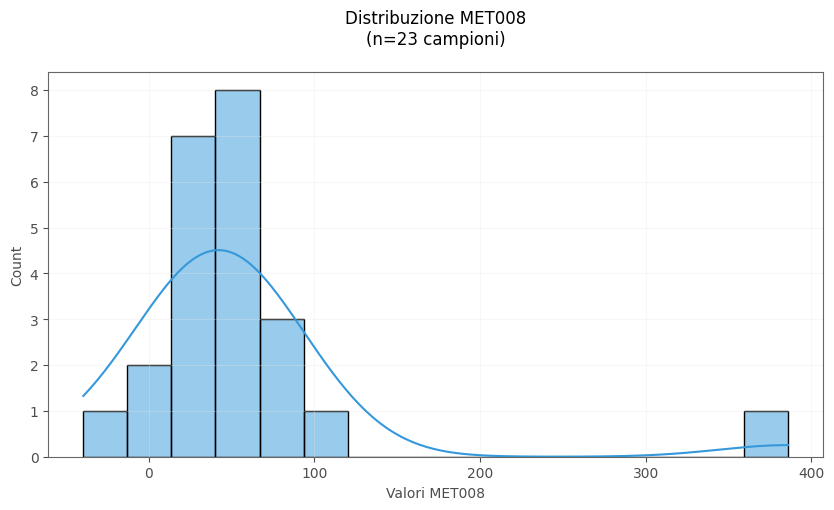

In [ ]:
# Test per analisi metriche produttività per Delivery
# Verifica distribuzione normalità e analisi correlazione con conteggio campioni
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Configurazione display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# --------------------------------------------------
# 1. FILTRAGGIO DATI E CONTEGGIO INIZIALE
# --------------------------------------------------
print("\n" + "="*50)
print("ANALISI INIZIALE DATI".center(50))
print("="*50)

# Filtra dataset per metriche rilevanti
df_filtered = df_synthetic[
    df_synthetic['MetricName_Anon'].str.contains('MET008', case=False, na=False) |
    df_synthetic['MetricName_Anon'].str.contains('MET002', case=False, na=False)
]

# Check 1: Conteggio record totali
print(f"\n  Record totali trovati: {len(df_filtered)}")
print(f" Breakdown per metrica:")
print(df_filtered['MetricName_Anon'].value_counts())

# --------------------------------------------------
# 2. PREPARAZIONE DATAFRAME PIVOT
# --------------------------------------------------
# Ristruttura dati in formato pivot
df_pivot = df_filtered.pivot_table(
    index=['YearMonth', 'EntityId_Anon'],
    columns='MetricName_Anon',
    values='Actual'
).dropna()

# Check 2: Conteggio campioni validi dopo pivot
print(f"\n🔍 Campioni validi dopo pivot/dropna: {len(df_pivot)}")
print("🎯 Dettaglio colonne presenti:")
print(df_pivot.columns.tolist())

# --------------------------------------------------
# 3. ANALISI NORMALITÀ MET008
# --------------------------------------------------
if 'MET008' in df_pivot.columns:
    print("\n" + "="*50)
    print("ANALISI NORMALITÀ MET008".center(50))
    print("="*50)

    # Check 3: Statistiche descrittive
    print(f"\n Statistiche descrittive MET008:")
    print(df_pivot['MET008'].describe().round(2))

    # Test Shapiro-Wilk con conteggio campioni effettivo
    sample_count = len(df_pivot['MET008'].dropna())
    print(f"\n Campioni utilizzati per test normalità: {sample_count}")

    if sample_count >= 3 and sample_count <= 5000:  # Range valido per Shapiro-Wilk
        stat, p_value = shapiro(df_pivot['MET008'])
        print(f"Shapiro-Wilk Test - MET008: statistic={stat:.4f}, p-value={p_value:.4f}")
        print("Distribuzione normale (p > 0.05)" if p_value > 0.05 else " Distribuzione non normale (p ≤ 0.05)")

        # Visualizzazione avanzata con info campioni
        plt.figure(figsize=(10, 5))
        sns.histplot(df_pivot['MET008'], kde=True, color='#3498db')
        plt.title(f"Distribuzione MET008\n(n={sample_count} campioni)", pad=20)
        plt.xlabel("Valori MET008")
        plt.grid(alpha=0.3)
        plt.show()
    else:
        print(f"Sample size {sample_count} non adatto per Shapiro-Wilk (deve essere 3 ≤ n ≤ 5000)")
else:
    print("\n ERRORE: Colonna MET008 non presente nei dati pivot")
